MTH522 Block: 1; Project: 1\
**Name:** Pradyoth Singenahalli Prabhu

### Importing libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

### Importing Data

In [10]:
df = pd.read_csv("/Volumes/work/MTH522/data/fatal-police-shootings-data.csv")

In [11]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7743 entries, 0 to 7742
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7743 non-null   int64  
 1   name                     7321 non-null   object 
 2   date                     7743 non-null   object 
 3   manner_of_death          7743 non-null   object 
 4   armed                    7534 non-null   object 
 5   age                      7258 non-null   float64
 6   gender                   7722 non-null   object 
 7   race                     6271 non-null   object 
 8   city                     7743 non-null   object 
 9   state                    7743 non-null   object 
 10  signs_of_mental_illness  7743 non-null   bool   
 11  threat_level             7743 non-null   object 
 12  flee                     6866 non-null   object 
 13  body_camera              7743 non-null   bool   
 14  longitude               

In [13]:
df.describe()

,id,age,longitude,latitude
count,7743.000000,7258.000000,6906.000000,6906.000000
mean,4275.703862,37.180077,-97.051309,36.683896
std,2417.587293,12.960438,16.593829,5.402856
min,3.000000,2.000000,-160.007000,19.498000
25%,2170.500000,27.000000,-112.038000,33.480000
50%,4301.000000,35.000000,-94.215500,36.105000
75%,6368.500000,45.000000,-83.069750,40.033000
max,8421.000000,92.000000,-67.867000,71.301000


In [14]:
df.isnull().values.any()

True

In [15]:
df.isnull().sum()

id                            0
name                        422
date                          0
manner_of_death               0
armed                       209
age                         485
gender                       21
race                       1472
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        877
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

**Observation:**
From looking at the above data we can conclude that these list of columns are addressed using **classication**

1.  manner_of_death
2.  armed
3.  age
4.  gender
5.  race
6.  city
7.  state
8.  signs_of_mental_illness
9.  threat_level
10. flee
11. body_camera

In [42]:
usa = gpd.read_file('/volumes/work/mth522/data/geo/states.shp')
type(usa)

# this date is taken from "https://www.arcgis.com/home/item.html?id=da77eeb252ae4a7f97302335ea36b224"

geopandas.geodataframe.GeoDataFrame

In [43]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


<AxesSubplot:>

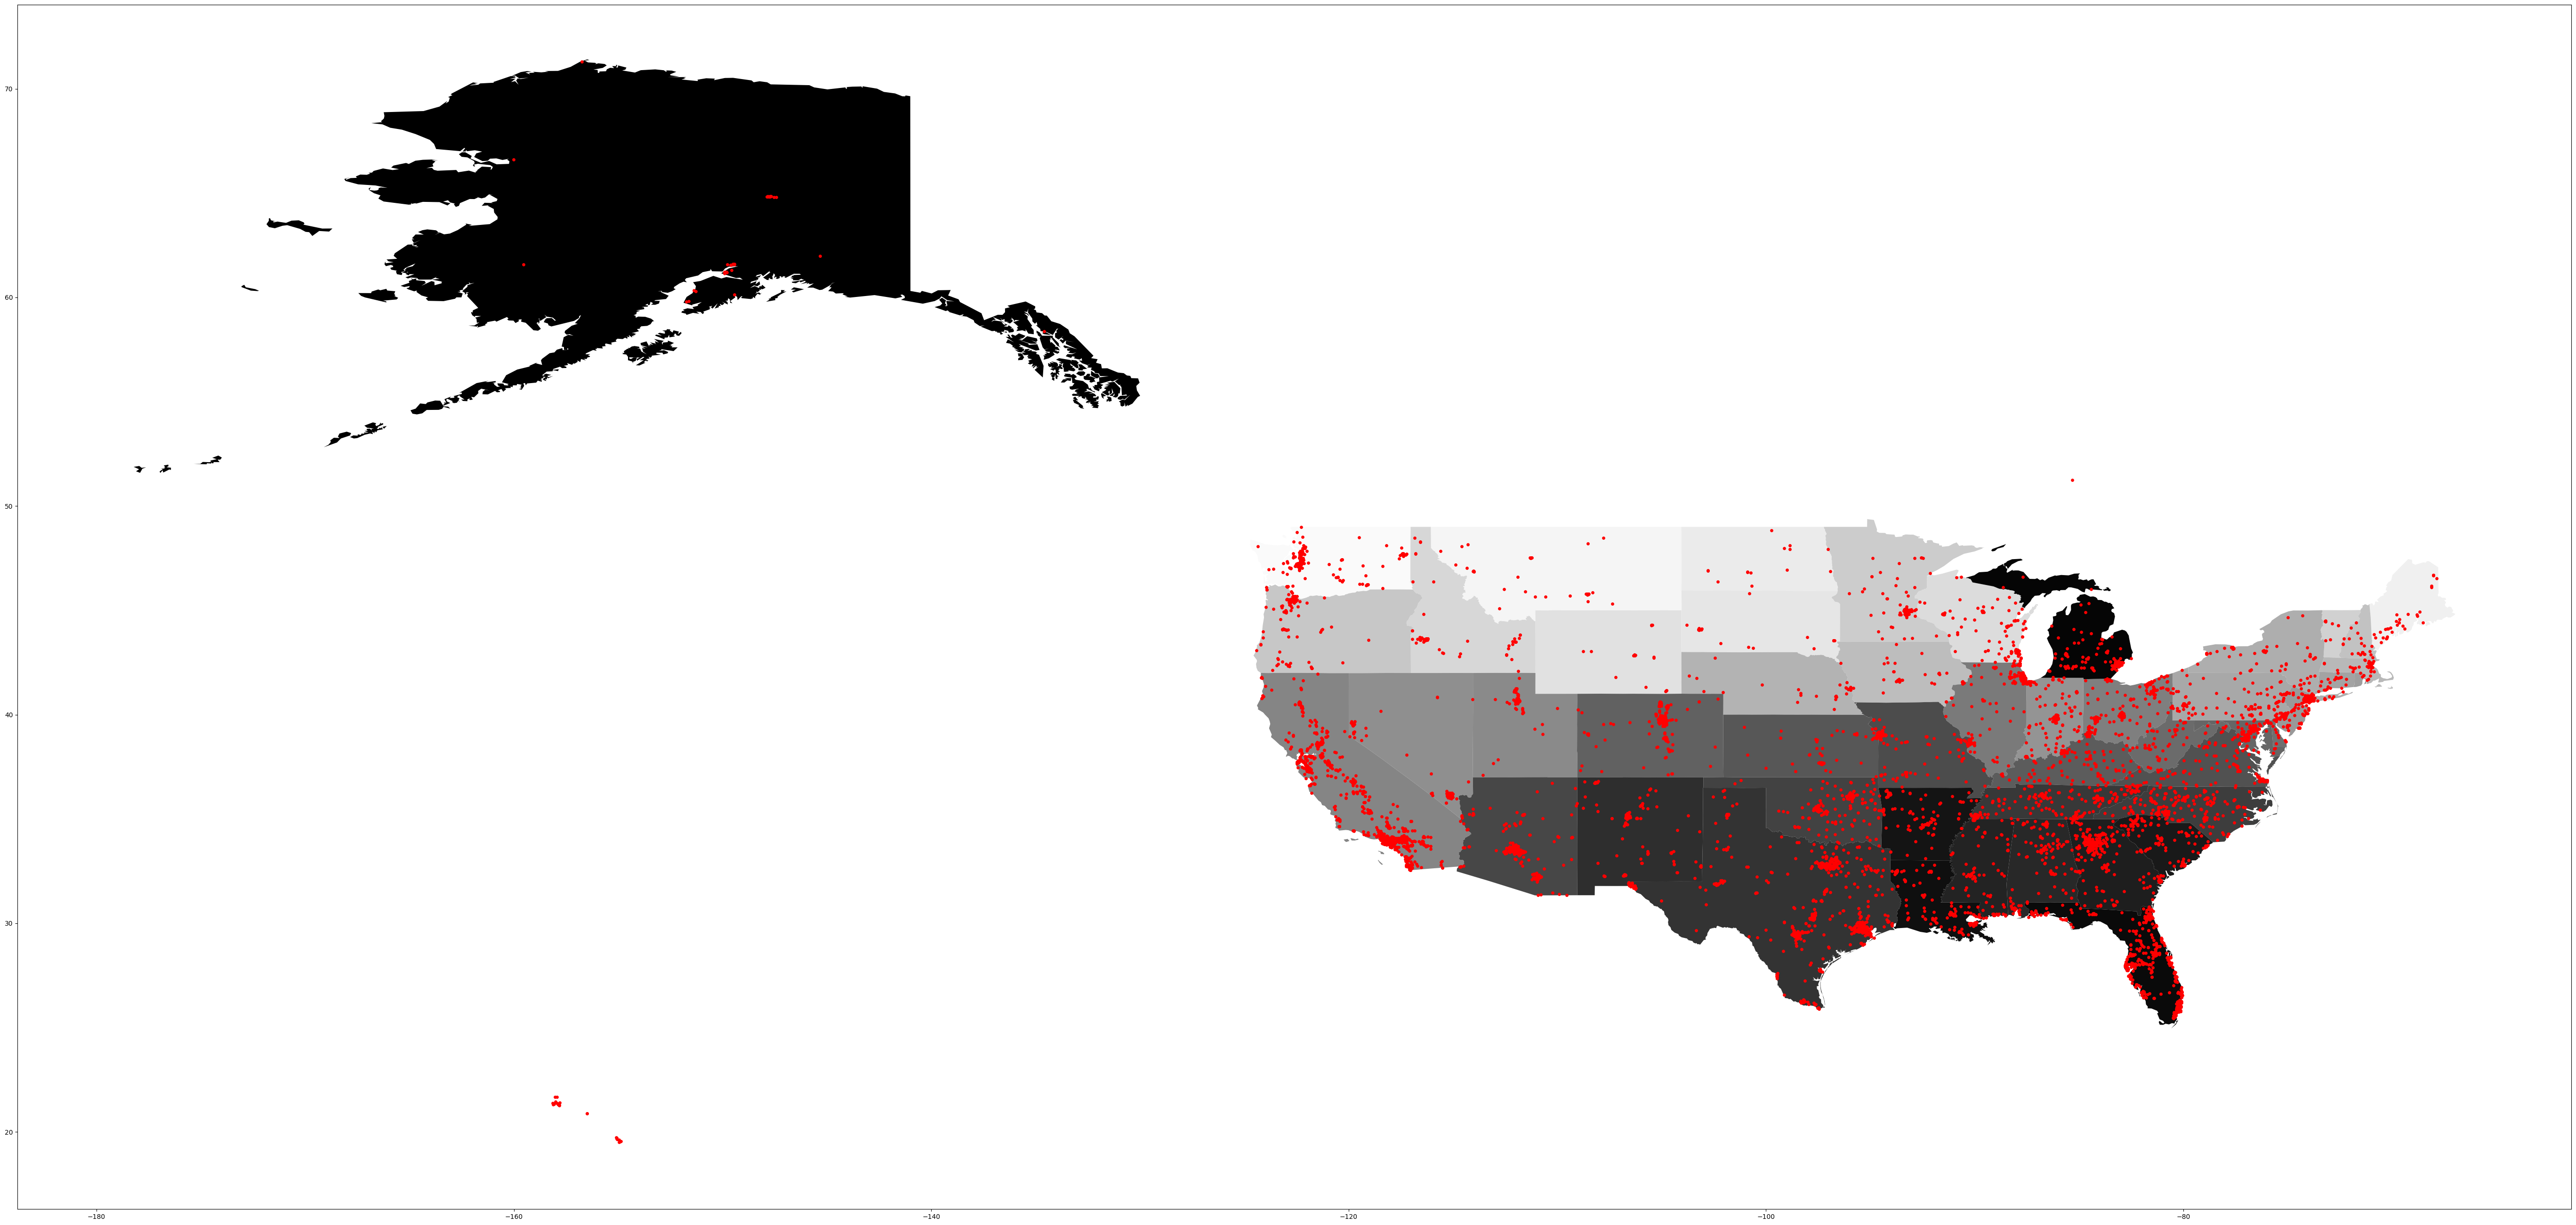

In [12]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

gdf.plot(ax=usa.plot(cmap='binary', figsize=(70, 70)), marker='o', color='red', markersize=15)

**Observation:**
From the above plot we can see that column ***'latitude'*** and ***'longitude'*** are addressed using **clustering**.